# Analysis of PE-HD market drivers

In [97]:
# importing Python libraries to be used
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas_profiling as pdpf
from IPython.display import HTML
import plotly.plotly as py

% matplotlib inline

## Reading and subsetting the data
* data is read out of the file as composed by Keyrus
* data is filtered by only keeping some important price variables, the fides data and the trade data
* only the period as of 01/01/2014 is retained, because trade data are only available as of then

In [107]:
# read data
data = pd.read_csv("\\\me0255\\users$\\MECLIJDA\\Data Science\\01 Pricing\\pomargin\\framework\\data\\" + 
                   "Borealis_margin_with_new_data.csv",sep=";",decimal=',')

# subset data: use specific columns
HDIM_prices = [0,3,5,9,13,31,155,168,169,170]
HDIM_Fides = [197,200,215,221,228,233]
HDIM_cols = HDIM_prices + HDIM_Fides
data = data[HDIM_cols]
data = data[:174]
data['Calendar Day'] = pd.to_datetime(data['Calendar Day'],format="%d/%m/%Y")

# subset data: use rows between 1/1/2014 and 31/12/2015
data = data[150:174]

# reindex
#data.set_index('Calendar Day',drop=False,inplace=True)

# add a new data field by combining 2 others
data['NetImp_HD'] = data['Import_HD']-data['Export_HD']

print "(rows: examples, cols: features) - " + str(data.shape)

HTML('<p><b><font color="DodgerBlue">' + "Variable list: " + '</font></b><i>' + str(data.columns.values.tolist()) + '</i></p>')

(rows: examples, cols: features) - (24, 17)


In [108]:
data.head(5) # show first 5 lines of data

,Calendar Day,Ethylene,HD IM,Naphtha,USD/EUR,marg_Ethylene_HD BM,Average of Ethylene MP,HDIM CHI dol,HDIM FD-NWE spot dol,HDIM WE-HKG dol,Market sales Total Europe HD,Market sales Total Sales HD,Market production HD,Market Stock HD,Import_HD,Export_HD,NetImp_HD
150,2014-01-01,1240,1469.00,918.5795,1.3610,195.0,977.50,1430.00,1732.27,302.27,326982,371127,410331,546202,122688,60439,62249
151,2014-02-01,1200,1438.75,913.6500,1.3659,202.5,825.00,1407.50,1651.43,243.93,348728,399848,380609,548977,86960,66325,20635
152,2014-03-01,1180,1420.00,911.4048,1.3823,205.0,806.00,1408.75,1671.26,262.51,380276,443493,403993,526569,97846,66123,31723
153,2014-04-01,1165,1405.00,925.6250,1.3813,205.0,797.50,1452.50,1674.55,222.05,368313,426325,390527,512858,90014,81876,8138
154,2014-05-01,1160,1400.00,937.8375,1.3732,205.0,816.25,1465.00,1694.55,229.55,375706,442966,424218,518973,102712,71368,31344


## Exploring the data
display trend plots of the different variables

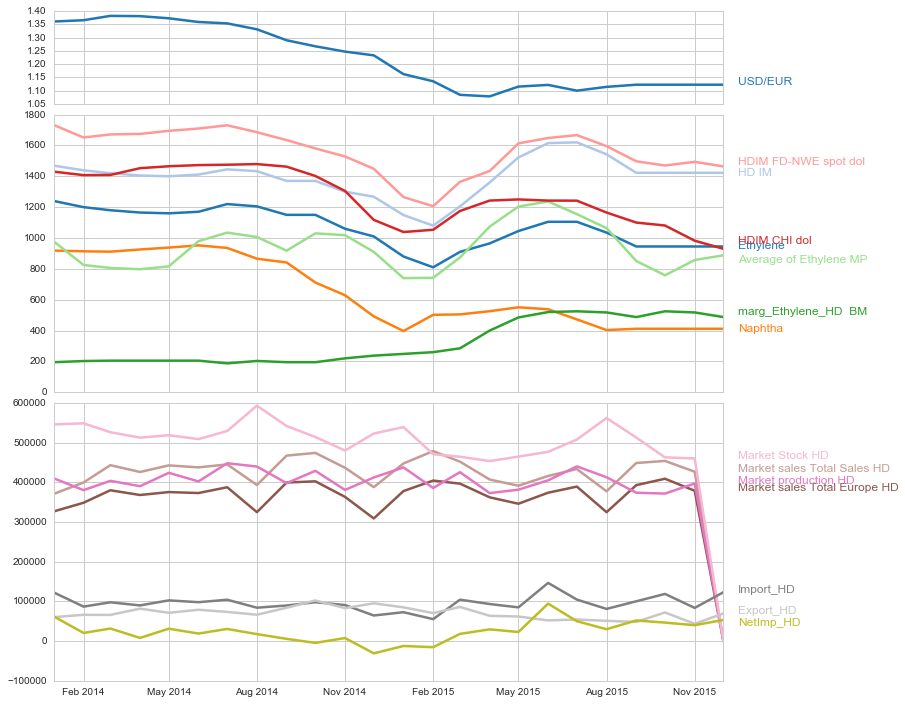

In [111]:
# plot the data on a time scale
sns.set_style("whitegrid")

# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    

primycols = data.columns.values.tolist()[1:9]
secoycols = data.columns.values.tolist()[10:]

f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True,figsize=(12, 12),gridspec_kw = {'height_ratios':[1, 3, 3]})
f.subplots_adjust(hspace=.05)

col = 'USD/EUR'
i = 0
ax1.plot(data['Calendar Day'].values, data[col].values, lw=2.5, color=tableau20[i])
y_pos = data[col].values[-2]
ax1.text(data.iloc[-1]['Calendar Day']+np.timedelta64(15, 'D'), y_pos, col, fontsize=12, color=tableau20[i])

for i, col in enumerate(primycols):
    if col == 'USD/EUR':
        pass
    else:
        ax2.plot(data['Calendar Day'].values, data[col].values, lw=2.5, color=tableau20[i])
        y_pos = data[col].values[-2]- 0.5*40+5
        ax2.text(data.iloc[-1]['Calendar Day']+np.timedelta64(15, 'D'), y_pos, col, fontsize=12, color=tableau20[i])

for i, col in enumerate(secoycols):
    ax3.plot(data['Calendar Day'].values, data[col].values, lw=2.5, color=tableau20[i+10])
    y_pos = data[col].values[-2] - 0.5*40+5
    if col == "Import_HD":
        y_pos = data[col].values[-1]+ 0.5*100
    elif col == "Export_HD":
        y_pos = data[col].values[-1]+ 0.5*100
    ax3.text(data.iloc[-1]['Calendar Day']+np.timedelta64(15, 'D'), y_pos, col, fontsize=12, color=tableau20[i+10])

plt.show()
#py.iplot_mpl(f,strip_style = True)

### Comments
#### Data Quality
* Missing data: Fides data dec 2015 missing
* Wrong data: Naphtha seems to have a too flat profile as of Aug 2015. Also Ethylene, HD IM, USD/EUR flatten out as of Sep 2015

#### Discussion of the data
* Prices dropping as of Q2 2014 with a lowest point in Jan 2015, recovery in the first 2 quarters of 2015, as of then declining again.
* Buying fell down suddenly in Aug 2014 (summer?)
* Spread ethylene - HD BM stable most of 2014, rising in 2015

## Create lag features for all data

In [5]:
# add lag variables
df = data
numLags = 4
for i in range(numLags):
    df = pd.merge(left=df,right=data.shift(i+1),left_index=True,right_index=True,suffixes=("","_lag"+str(i+1)))
df=df.replace(0, np.nan)
print df.shape

(24, 85)


The original 17 features are multiplied 4 times by adding lag1 to lag4 features (17+17*4)

## Create Pearson correlation matrix

In [6]:
# create Pearson correlation matrix
corrmat = df.corr()
print corrmat.shape

(80, 80)


## Plot data relations between variables
Each plot in the grid shows the relation between 2 variables.

The **corr-value** is the Pearson correlation coefficient between two random variables $X$ and $Y$ and is defined as
$$r = \frac{cov(X,Y)}{\sqrt{var(X)} \sqrt{var(Y)}}$$
with
$$ cov(X,Y)=\frac1{n-1}\sum_{i=1}^n(X_i-\bar X)(Y_i-\bar Y) $$
and
$$ var(X)=\frac1{n-1}\sum_{i=1}^n(X_i-\bar X)^2 $$

* High correlation: 0.5 to 1.0 or -0.5 to -1.0.
* Medium correlation: 0.3 to 0.5 or -0.3 to -0.5.
* Low correlation: 0.1 to 0.3 or -0.1 to -0.3.

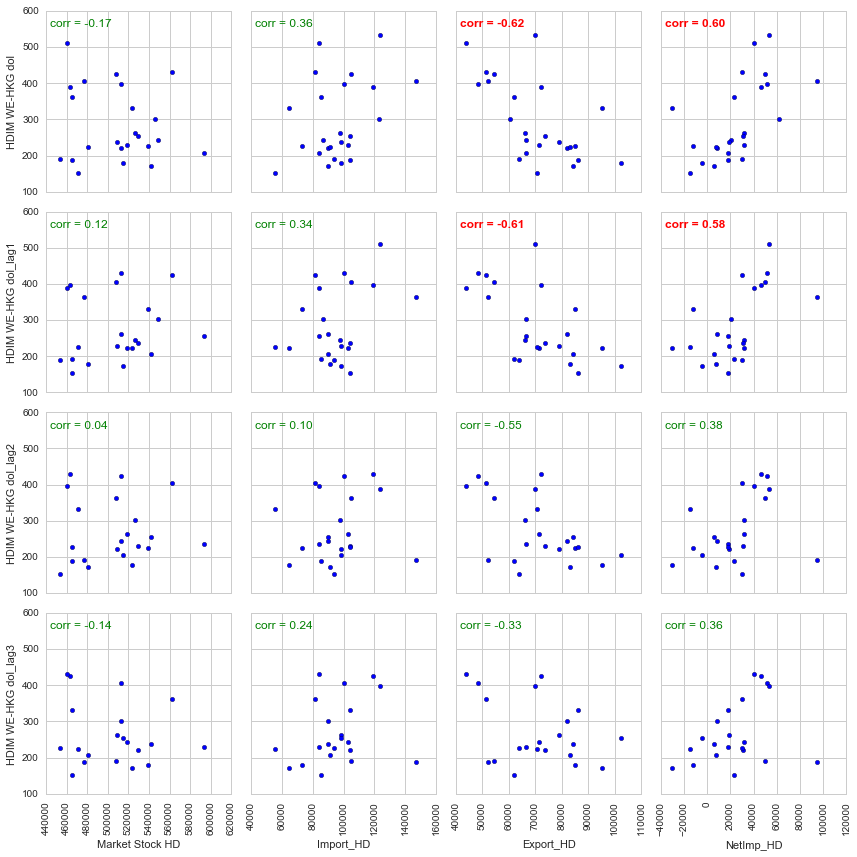

In [7]:
#col = [df.columns.values.tolist()[b] for b in [7,8,9,10]]
col = [df.columns.values.tolist()[b] for b in [13,14,15,16]]
rowvar = "HDIM WE-HKG dol"
row = [rowvar] + [rowvar + '_lag' + str(i+1) for i in range(3)]
#row = [df.columns.values.tolist()[b] for b in [7,8,9,10]]

def plotDataRelations(row, col):
    sns.set_style("whitegrid")
    f, axes = plt.subplots(len(row), len(col), figsize=(3*len(col), 3*len(row)),sharey=True)
    for i, stri in enumerate(row):
        axes[i,0].set_ylabel(stri)
        for j, strj in enumerate(col):
            axes[i,j].scatter(df[strj],df[stri])
            #axes[i,j].annotate(corrmat[stri][strj],xy=(1100,0))
            if (abs(corrmat[stri][strj]) > 0.55):
                axes[i,j].text(0.02, 0.93,"corr = " + '{0:.2f}'.format(corrmat[stri][strj]), 
                    ha='left', va='center', transform=axes[i,j].transAxes, size=12, color='r',weight='bold')
            else:
                axes[i,j].text(0.02, 0.93,"corr = " + '{0:.2f}'.format(corrmat[stri][strj]), 
                    ha='left', va='center', transform=axes[i,j].transAxes, size=12, color='g')
            #sns.regplot(x=stri,y=strj,data=df,ax=axes[i,j],ci=None,fit_reg=True)
            if stri == row[-1]:
                axes[i,j].set_xlabel(strj)
                for tick in axes[i,j].get_xticklabels():
                    tick.set_rotation(90)
            else:
                plt.setp(axes[i,j].get_xticklabels(), visible=False)
            #plt.xticks(rotation=45)

    f.tight_layout()
    plt.show()

plotDataRelations(row, col)

**<span style="color:red">Can the spread between Europe and Asia be used to predict imports/exports to/from Europe?</span>**

### Results
* 'HDIM WE-HKG dol' spreads do not predict Import, Export or Net Imp volumes well
* NetImp and Export show still some correlation with 'HDIM WE-HKG dol' and 'HDIM WE-HKG dol_lag1', but in practice these findings cannot be used because the data are not available (in July only trade data for April (lag3) are available)

## Heatmap for orginal data
showing correlations between data

**<span style="color:red">What are the most obvious correlations between the data?</span>**

Split base volume versus incremental volumes?

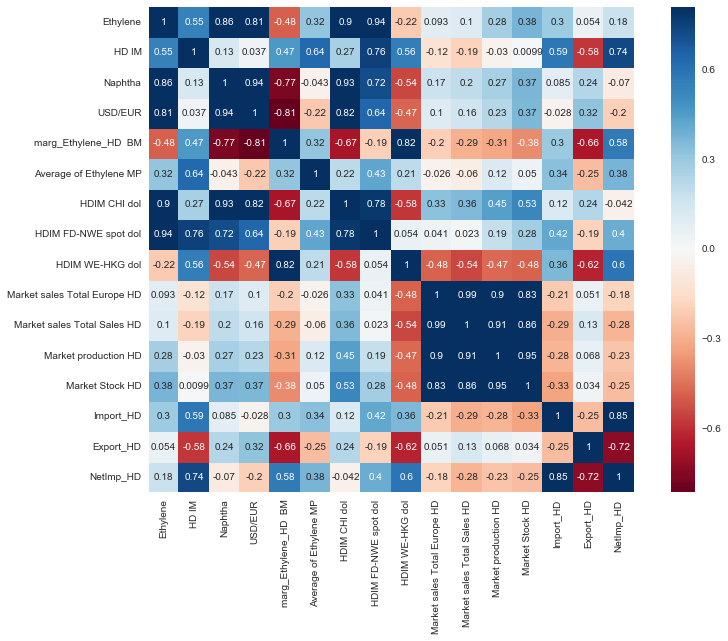

In [8]:
# generate heatmap
corrmat1 = data.corr()

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat1, vmax=.8, square=True, yticklabels=True, annot=True,cmap="RdBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

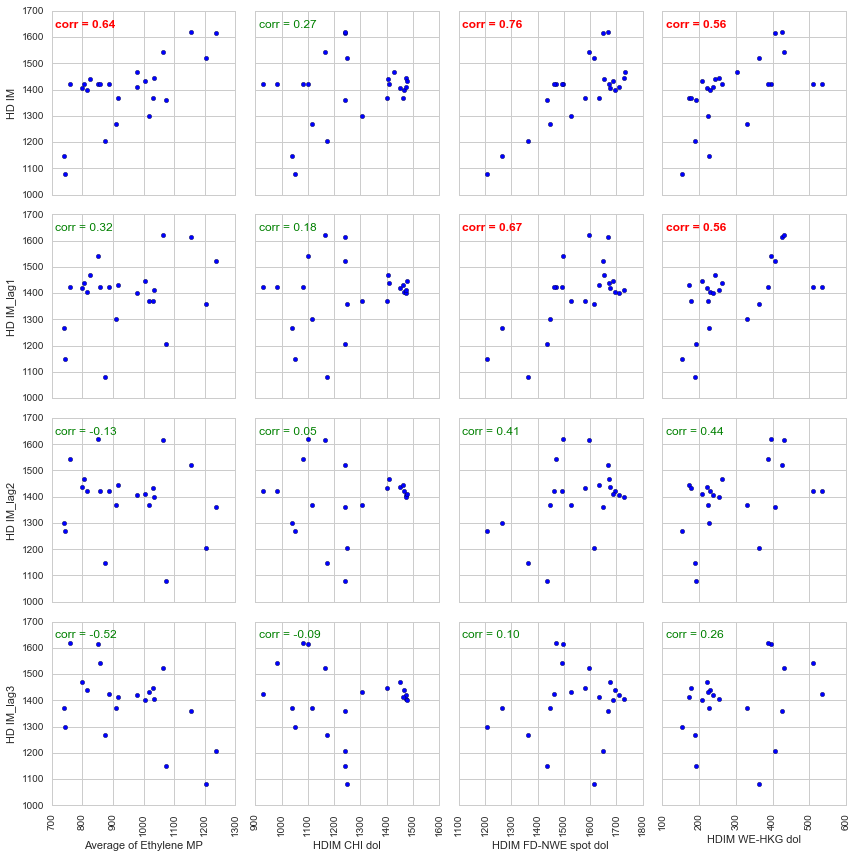

In [89]:
col = [df.columns.values.tolist()[b] for b in [6,7,8,9]]
#col = [df.columns.values.tolist()[b] for b in [13,14,15,16]]
rowvar = "HD IM"
row = [rowvar] + [rowvar + '_lag' + str(i+1) for i in range(3)]
#row = [df.columns.values.tolist()[b] for b in [7,8,9,1]]
plotDataRelations(row, col)

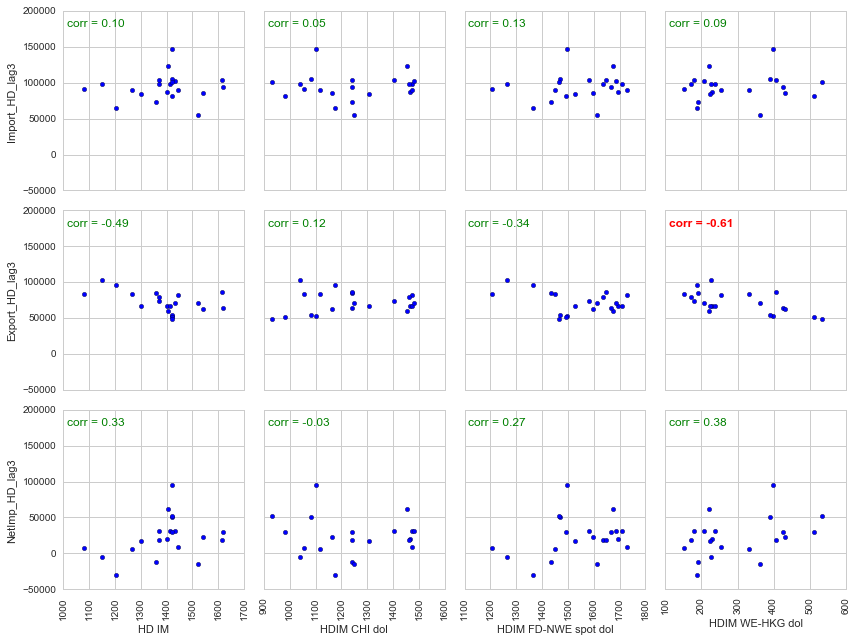

In [10]:
row = [df.columns.values.tolist()[b]+"_lag3" for b in [14,15,16]]
col = ['HD IM','HDIM CHI dol', 'HDIM FD-NWE spot dol', 'HDIM WE-HKG dol']
plotDataRelations(row, col)

### Observations
Usually we only know the lag3 values of the trade data. They however do not show any big relation with current prices in Europe or Asia.

### Next steps (3/08/2016 - discussed with Markus):
* value chain to be fixed: what is balance in Europe -> which data are needed/available?
* differentiate fixed base volume and incremental volumes